In [3]:
import os
os.getcwd()

'/home/leigh/dissertation/neo-axes/appendices'

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import ndimage as ndi

(-0.5, 1238.5, 1749.5, -0.5)

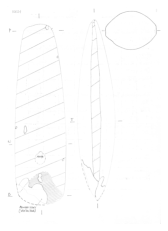

In [6]:
segments = cv2.imread('../drawings/10031d.jpg')
imgray = cv2.cvtColor(segments, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray, cmap="gray");
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

(-0.5, 1238.5, 1749.5, -0.5)

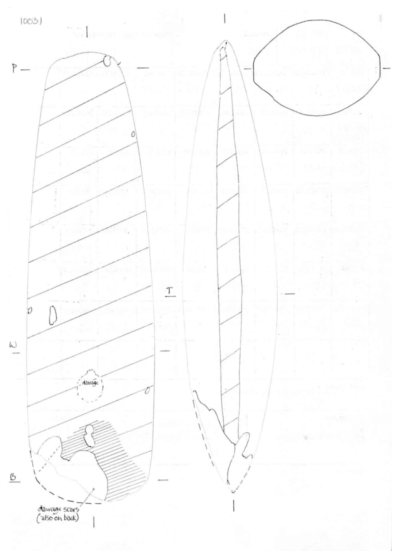

In [7]:
bilateral_filtered_image = cv2.bilateralFilter(imgray, 5, 500, 500)

plt.imshow(bilateral_filtered_image, cmap="gray");
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

(-0.5, 1238.5, 1749.5, -0.5)

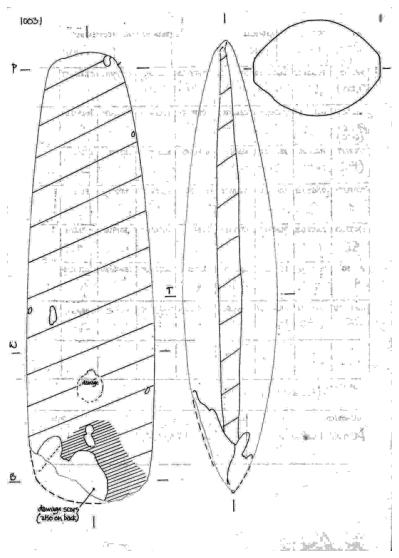

In [8]:
#trying out histogram equalization to improve contrast, doesn't work on all drawings

hist,bins = np.histogram(imgray.flatten(),260,[0,50])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_histeq = cdf[imgray]

plt.imshow(img_histeq, cmap="gray")
plt.rcParams["figure.figsize"] = (30,30)
plt.axis('off')

(-0.5, 1238.5, 1749.5, -0.5)

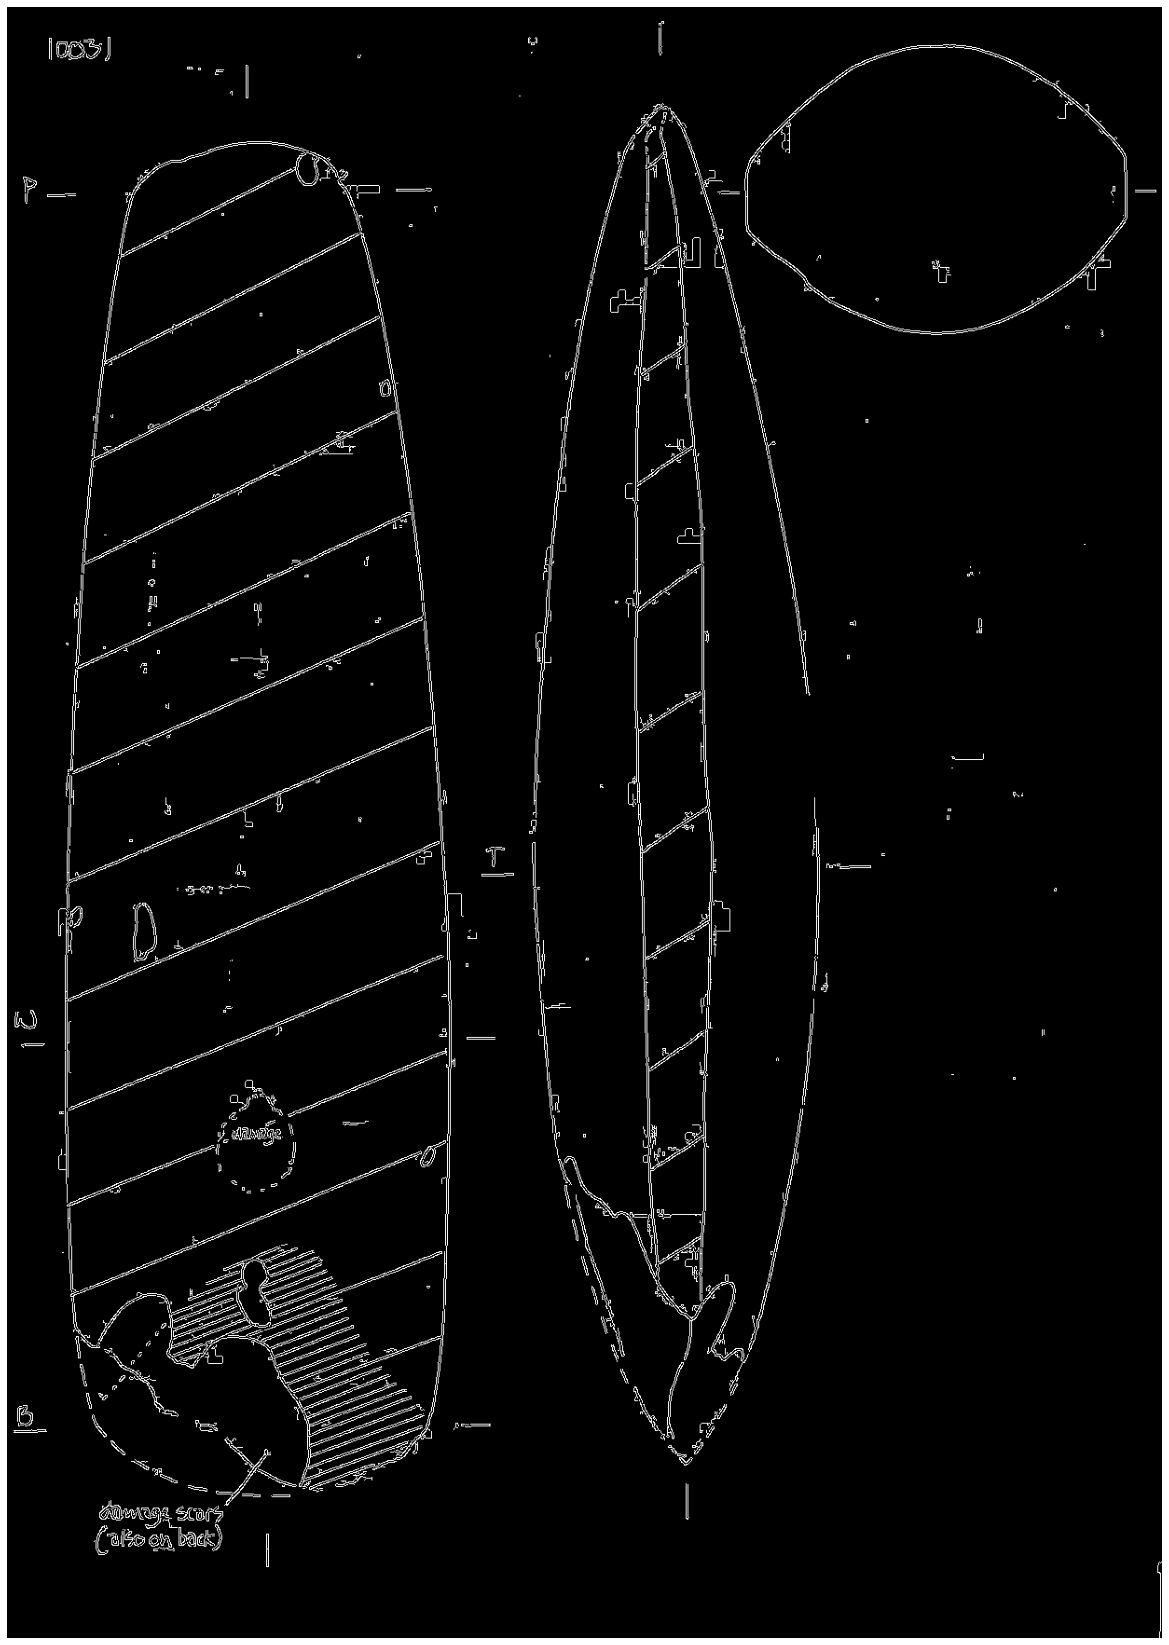

In [9]:
#useful for original images with very faint lines, can adjust lower threshold
edge_detected_image = cv2.Canny(imgray, 1, 100)

plt.imshow(edge_detected_image, cmap="gray")
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

True

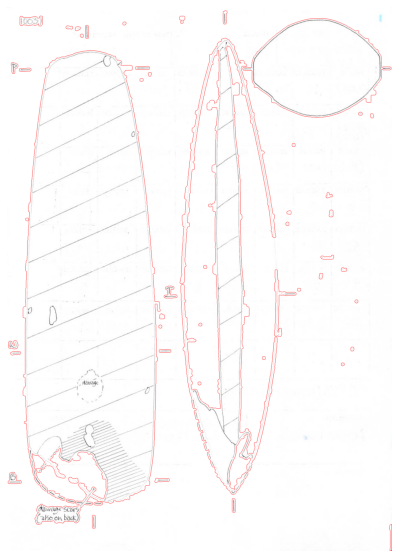

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(edge_detected_image, kernel)
contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outlines = segments.copy()

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 4) & (area > 60) ):
        contour_list.append(contour)
        
cv2.drawContours(outlines, contour_list, -1, (255,0,0))
plt.imshow(outlines)
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

cv2.imwrite("../figure/10031-contours.jpg", outlines)

519433.0
144350.0
100798.5


True

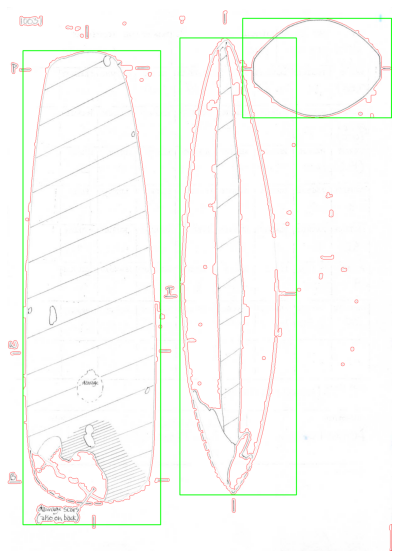

In [25]:
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    print(cv2.contourArea(c))
    x,y,w,h = rect
    cv2.rectangle(outlines,(x,y),(x+w,y+h),(0,255,0),2)
    #cv2.putText(segments,'axes detected',(x+w+10,y+h),0,0.3,(0,255,0))
plt.imshow(outlines)
plt.rcParams["figure.figsize"] = (30,30)
plt.axis('off')

cv2.imwrite("../figure/10031-boxes.jpg", outlines)

(-0.5, 391.5, 696.5, -0.5)

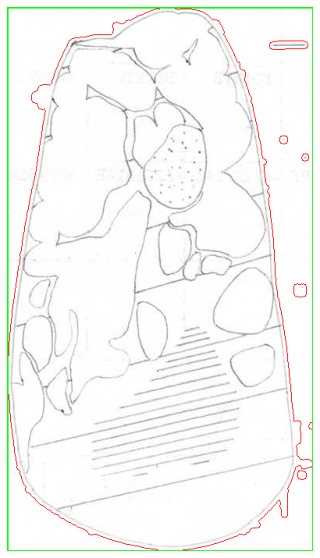

In [9]:
boxes = []
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    x,y,w,h = rect
    cv2.rectangle(outlines,(x,y),(x+w,y+h),(0,255,0),2)
    list(rect)
    boxes.append(rect)
    
num = 0
for box in boxes:
    x,y,w,h = box
    ROI = outlines[y:y+h, x:x+w]
    
plt.imshow(ROI)
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

In [12]:
#get list of boxes
boxes = []
contour_areas = []
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    x,y,w,h = rect
    list(rect)
    boxes.append(rect)
    area = cv2.contourArea(c)
    contour_areas.append(area)

In [13]:
contour_areas

[519433.0, 144350.0, 100798.5]

In [14]:
type(boxes)

list

In [15]:
first = boxes[0]
second = boxes[1]
third = boxes[2]

In [16]:
plan = imgray[first[1]:first[1]+first[3],
                  first[0]:first[0]+first[2]]

profile = imgray[second[1]:second[1]+second[3],
                  second[0]:second[0]+second[2]]

top = imgray[third[1]:third[1]+third[3],
                  third[0]:third[0]+third[2]]

In [17]:
thresh, prof_thresh = cv2.threshold(profile, 250, 255, cv2.THRESH_BINARY_INV);

profile_ff = prof_thresh.copy()

h, w = profile.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(profile_ff, mask, (0,0), 255);

profile_ff_inv = cv2.bitwise_not(profile_ff)

profile_filled = prof_thresh | profile_ff_inv

(-0.5, 374.5, 1469.5, -0.5)

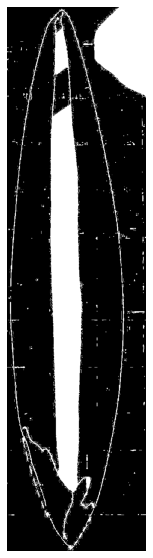

In [23]:
plt.imshow(profile_filled, cmap="gray")
plt.axis("off")

(-0.5, 442.5, 1524.5, -0.5)

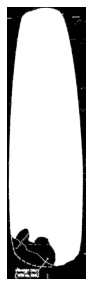

In [21]:
thresh, plan_thresh = cv2.threshold(plan, 250, 255, cv2.THRESH_BINARY_INV);

plan_ff = plan_thresh.copy()

h, w = plan.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(plan_ff, mask, (0,0), 255);

plan_ff_inv = cv2.bitwise_not(plan_ff)

plan_filled = plan_thresh | plan_ff_inv

plt.imshow(plan_filled, cmap="gray")
plt.rcParams["figure.figsize"] = (5,5)
plt.axis("off")

(-0.5, 478.5, 319.5, -0.5)

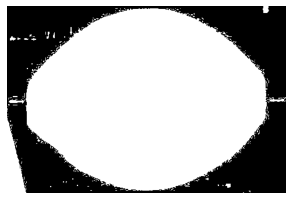

In [22]:
thresh, top_thresh = cv2.threshold(top, 250, 255, cv2.THRESH_BINARY_INV);

top_ff = top_thresh.copy()

h, w = top.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(top_ff, mask, (0,0), 255);

top_ff_inv = cv2.bitwise_not(top_ff)

top_filled = top_thresh | top_ff_inv


plt.imshow(top_filled, cmap="gray")
plt.rcParams["figure.figsize"] = (10,10)
plt.axis("off")

https://stackoverflow.com/questions/10262600/how-to-detect-region-of-large-of-white-pixels-using-opencv

In [ ]:
cv2.imwrite("10031-profile.jpg", profile)